In [11]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 8
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H =  H0+H1  # 哈密顿量
Q1 = b1.dag() * b1.dag() * b2.dag() * b2
Q2 = b1.dag() * b1.dag() * b2 * b2.dag() 
Q3 = b1.dag() * b1 * b2.dag() * b2.dag() 
Q4 = b1 * b1.dag() * b2.dag() * b2.dag() 

# 定义时间范围和时间间隔
t_list1 = np.linspace(0, 2000000, 2000000) # 时间范围
tau1 = 0.01  # 时间间隔
times=[]

psi1_0 = tensor(fock(N, 1), fock(N, 0))  
# opts = Options(rhs_reuse=True)

# 定义时间范围和时间间隔
t_list2 = np.linspace(0, 2500000, 2500000) # 时间范围
tau2 = 0.01  # 时间间隔
times_2=[]

# 计算随时间演化的期望值
# possibility1 = []
# expectation_values_Q3=[]
# expectation_values_Q4=[]
possibility_Q3 = []
possibility_Q4 = []

psi_t = psi1_0

for t2 in t_list2:
    t1_2 = t2 * tau2
    times1 = [t1_2,t1_2+tau2]
    result = sesolve(H, psi_t, times1, [])
    psi_t_plus_tau = result.states[1]
    psi_t = result.states[0]

    # print(Psi_t1,Psi_t1_plus_tau1)
    expectation_value_Q3 = psi_t_plus_tau.dag() * Q3 * psi_t
    expectation_value_Q4 = psi_t_plus_tau.dag() * Q4 * psi_t

    # expectation_values_Q3.append(expectation_value_Q3[0,0])
    # expectation_values_Q4.append(expectation_value_Q4[0,0])
    
    possibility_Q3.append(np.vdot(expectation_value_Q3,expectation_value_Q3).real) 
    possibility_Q4.append(np.vdot(expectation_value_Q4,expectation_value_Q4).real) 
    
    times_2.append(t1_2)

    psi_t = psi_t_plus_tau.copy()


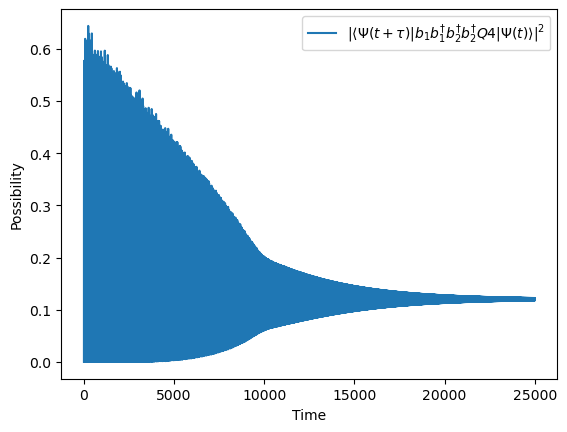

In [13]:

# 绘制结果
# plt.plot(times_2, expectation_values_Q3, label=r'$\langleΨ(t+\tau)|b_1^{\dagger} b_1 b_2^{\dagger} b_2^{\dagger}Q3|Ψ(t) \rangle$')
# plt.plot(times_2, expectation_values_Q4, label=r'$\langleΨ(t+\tau)|b_1 b_1^{\dagger} b_2^{\dagger} b_2^{\dagger}Q4|Ψ(t) \rangle$')
# plt.plot(times_2, possibility_Q3, label=r'$|\langleΨ(t+\tau)|b_1^{\dagger} b_1 b_2^{\dagger} b_2^{\dagger}Q3|Ψ(t) \rangle|^2$')
plt.plot(times_2, possibility_Q4, label=r'$|\langleΨ(t+\tau)|b_1 b_1^{\dagger} b_2^{\dagger} b_2^{\dagger}Q4|Ψ(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Possibility')
plt.legend()
plt.show()